In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Larger figures

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import auc, roc_curve, f1_score, accuracy_score, precision_recall_curve, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

# Practice #1

Classification trees with Titanic data file

## Data Loading

**Attribute Information**:
  1. ID number
  2. Diagnosis (M = malignant, B = benign)
  3-32. Ten real-valued features are computed for each cell nucleus:
     - a) radius (mean of distances from center to points on the perimeter)
     - b) texture (standard deviation of gray-scale values)
     - c) perimeter
     - d) area
     - e) smoothness (local variation in radius lengths)
     - f) compactness (perimeter^2 / area - 1.0)
     - g) concavity (severity of concave portions of the contour)
     - h) concave points (number of concave portions of the contour)
     - i) symmetry
     - j) fractal dimension ("coastline approximation" - 1)



Let's load the dataset and review null values

In [2]:
import openpyxl
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Get the number of observations
num_observations = df.shape[0]

print(f'The dataset has {num_observations} observations.')

df.head()

The dataset has 569 observations.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print ("Records and variables: ", df.shape)
print ("Column names: ", df.columns.to_list())

Records and variables:  (569, 33)
Column names:  ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [4]:
df.isnull().sum() #null values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The variable Unnamed seems to only have nulls <BR>
We can discard unnamed. <BR>
We can also discard id since it doesn't provide much information.


In [5]:
df['id'].unique() 

array([   842302,    842517,  84300903,  84348301,  84358402,    843786,
          844359,  84458202,    844981,  84501001,    845636,  84610002,
          846226,    846381,  84667401,  84799002,    848406,  84862001,
          849014,   8510426,   8510653,   8510824,   8511133,    851509,
          852552,    852631,    852763,    852781,    852973,    853201,
          853401,    853612,  85382601,    854002,    854039,    854253,
          854268,    854941,    855133,    855138,    855167,    855563,
          855625,    856106,  85638502,    857010,  85713702,     85715,
          857155,    857156,    857343,    857373,    857374,    857392,
          857438,  85759902,    857637,    857793,    857810,    858477,
          858970,    858981,    858986,    859196,  85922302,    859283,
          859464,    859465,    859471,    859487,    859575,    859711,
          859717,    859983,   8610175,   8610404,   8610629,   8610637,
         8610862,   8610908,    861103,   8611161, 

In [6]:
# droppping id and unnamed columns
df.drop(labels=['id', 'Unnamed: 32'], axis=1, inplace=True)

In [7]:
from collections import Counter

def class_perc(data):
    lendata = len(data)
    classes = Counter(data)
    
    for sclass, freq in classes.items():
        perc = (freq / lendata) * 100
        print(f"Class '{sclass}': {perc:.2f}%")

class_perc(df['diagnosis'])

Class 'M': 37.26%
Class 'B': 62.74%


In [8]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Convert the categorical target variable to a binary variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

We are going to split it into training and test (with same class distribution of survived variable in each set)

In [10]:
from sklearn.model_selection import train_test_split

def split_df(dataframe, seed=None, percentage=0.8):
    
    X = df.loc[:, dataframe.columns != 'diagnosis']
    y = df['diagnosis']

    return train_test_split(X, y, test_size=1-percentage, random_state=seed, stratify=y) # note the stratify parameter

X_train, X_test, Y_train, Y_test = split_df(df, seed=42, percentage=0.5)

In [11]:
"""
This script prints the shapes of the training and testing datasets and calculates the class percentages for the training and testing labels.

Functions:
    class_perc: A function that calculates and prints the percentage of each class in the given dataset.

Variables:
    X_train (DataFrame): The training dataset features.
    X_test (DataFrame): The testing dataset features.
    Y_train (Series): The training dataset labels.
    Y_test (Series): The testing dataset labels.
"""

print("Training data set: ", X_train.shape)
print("Testing data set: ", X_test.shape)
class_perc(Y_train.to_frame(name='diagnosis')["diagnosis"])
class_perc(Y_test.to_frame(name='diagnosis')["diagnosis"])

Training data set:  (284, 30)
Testing data set:  (285, 30)
Class '1': 37.32%
Class '0': 62.68%
Class '0': 62.81%
Class '1': 37.19%


## Classification Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

cancer_tree = DecisionTreeClassifier(random_state=42)
cancer_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

Let's take a look to the performance of the classifier (by using initially Accuracy)

In [13]:
from sklearn.metrics import mean_squared_error
predictions = cancer_tree.predict(X_test)
print("Accuracy = {0:.4f}".format(accuracy_score(Y_test, predictions)))

Accuracy = 0.9158


Now we will take a look to the tree itself. This is a bit complex since sklearn does not provide a way to visualize the models. To that end, we will need to make use of an external library: `pydotplus`.

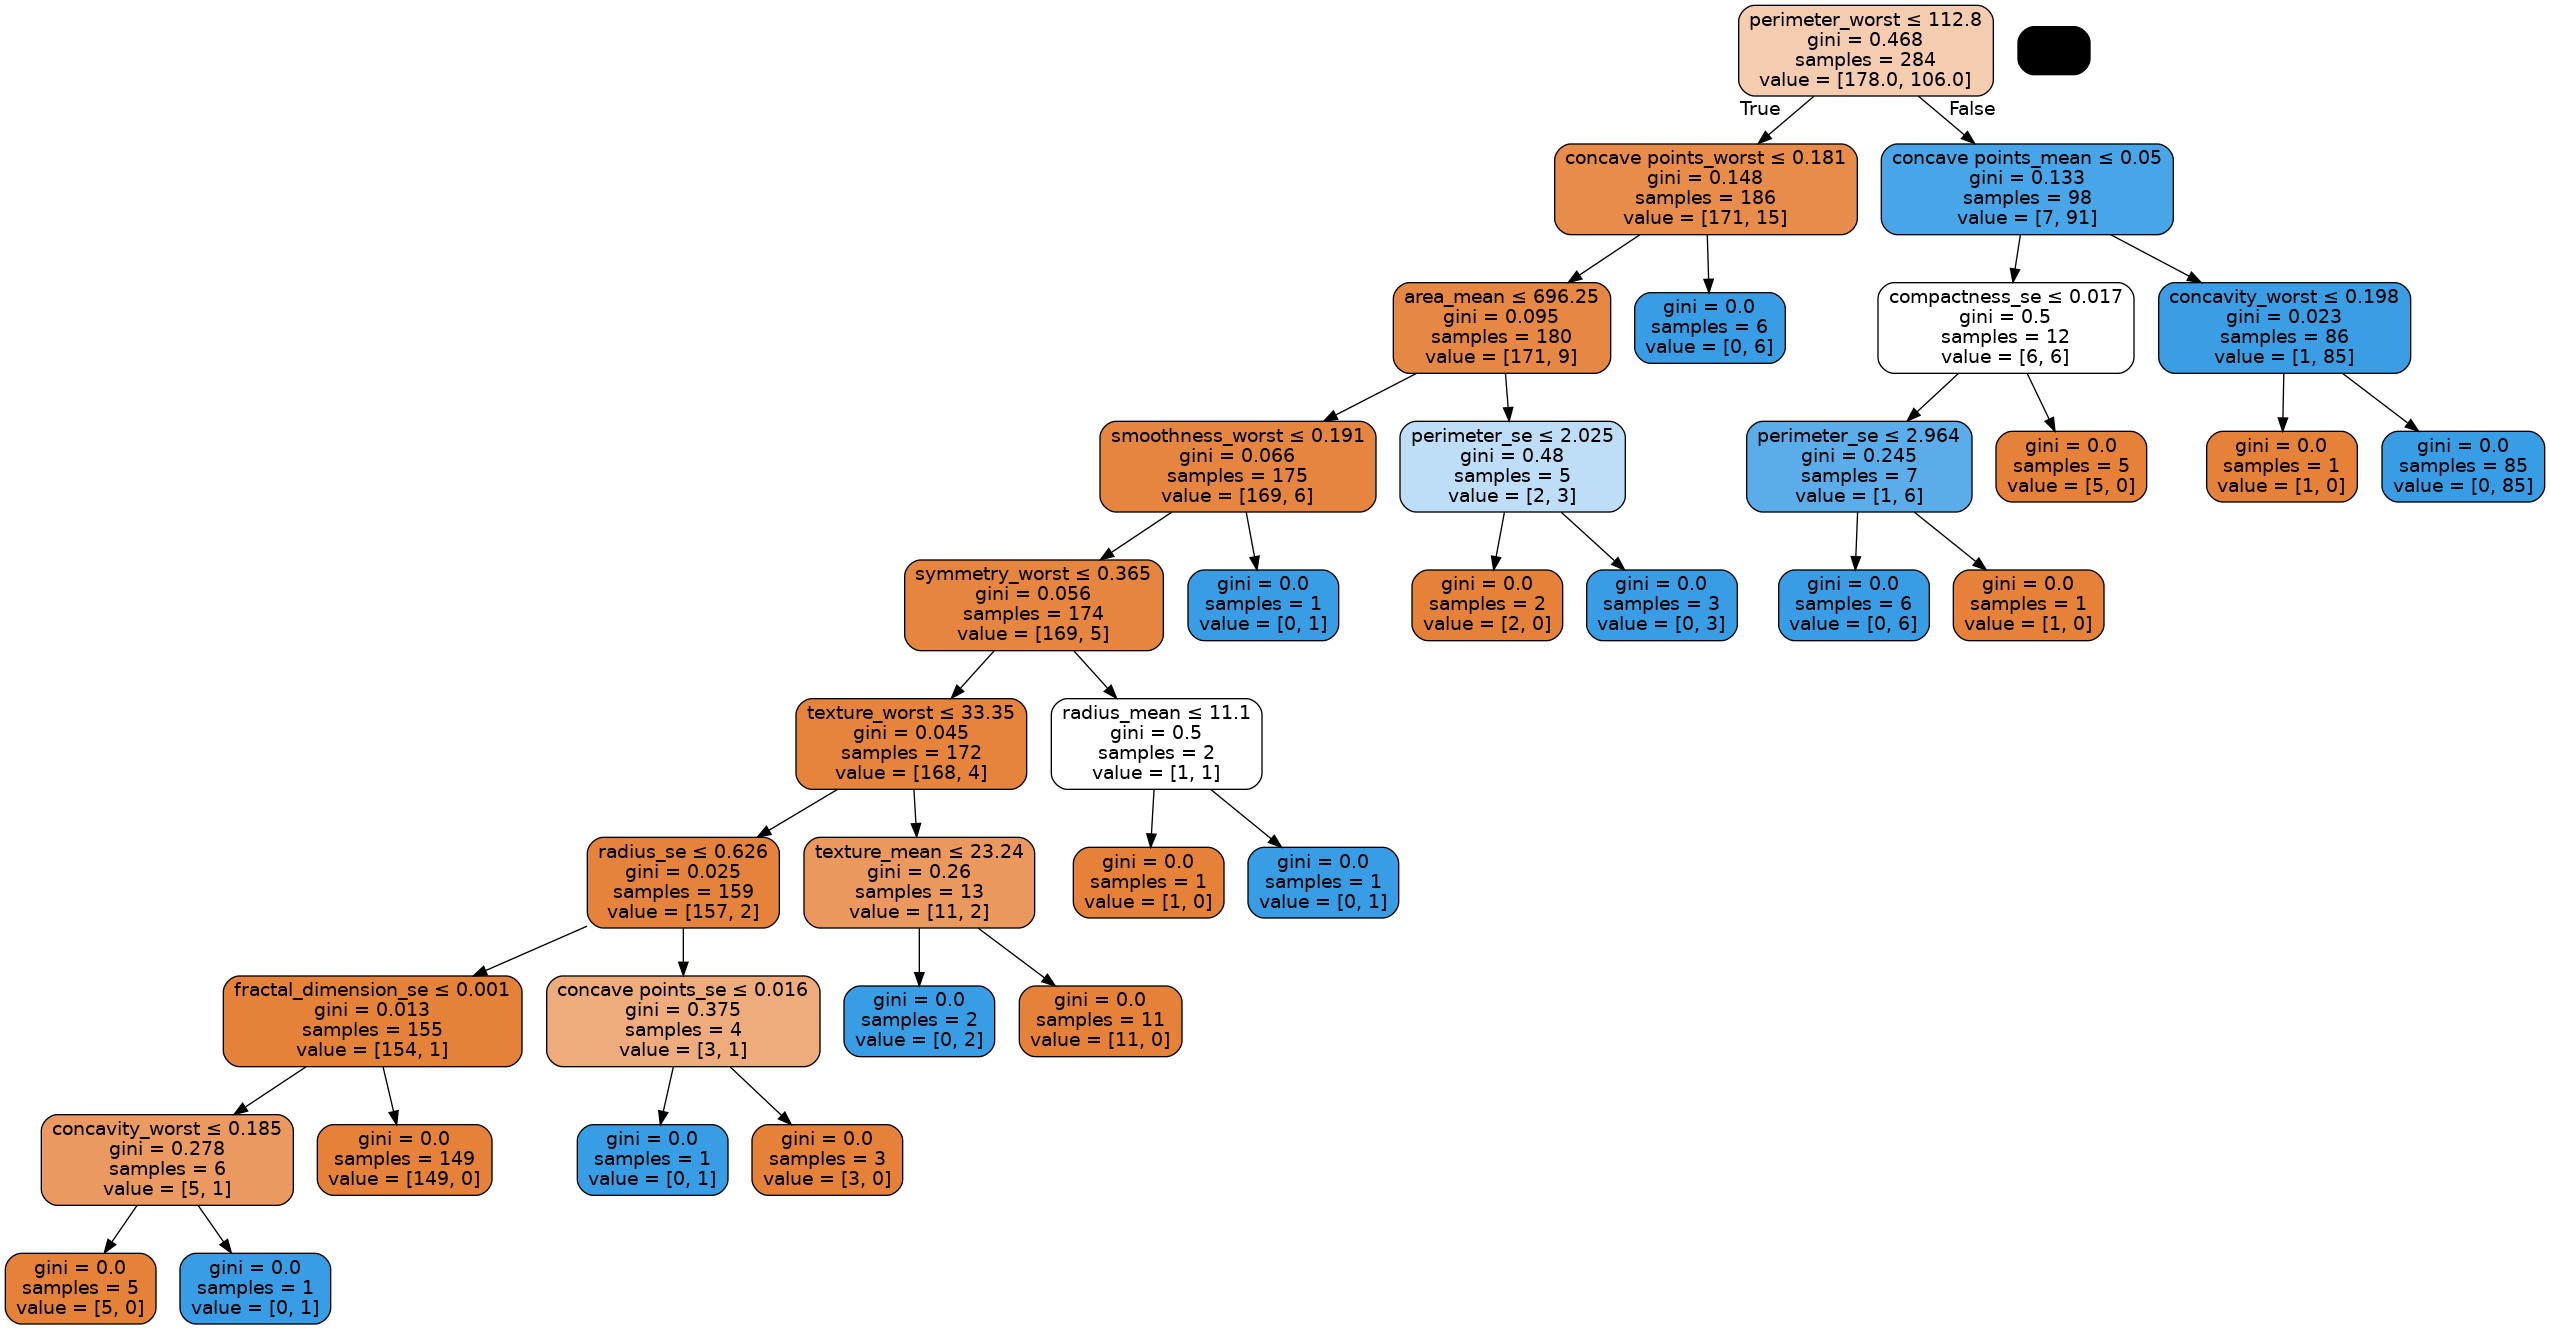

In [14]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from io import StringIO

def plot_tree(tree, feature_names):
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, feature_names=feature_names,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

plot_tree(cancer_tree, X_train.columns)



In [15]:
# How many nodes and leaves?
print("Number of nodes: ", cancer_tree.tree_.node_count)
print("Number of leaves: ", cancer_tree.get_n_leaves())

Number of nodes:  35
Number of leaves:  18


We will plot the feature importance

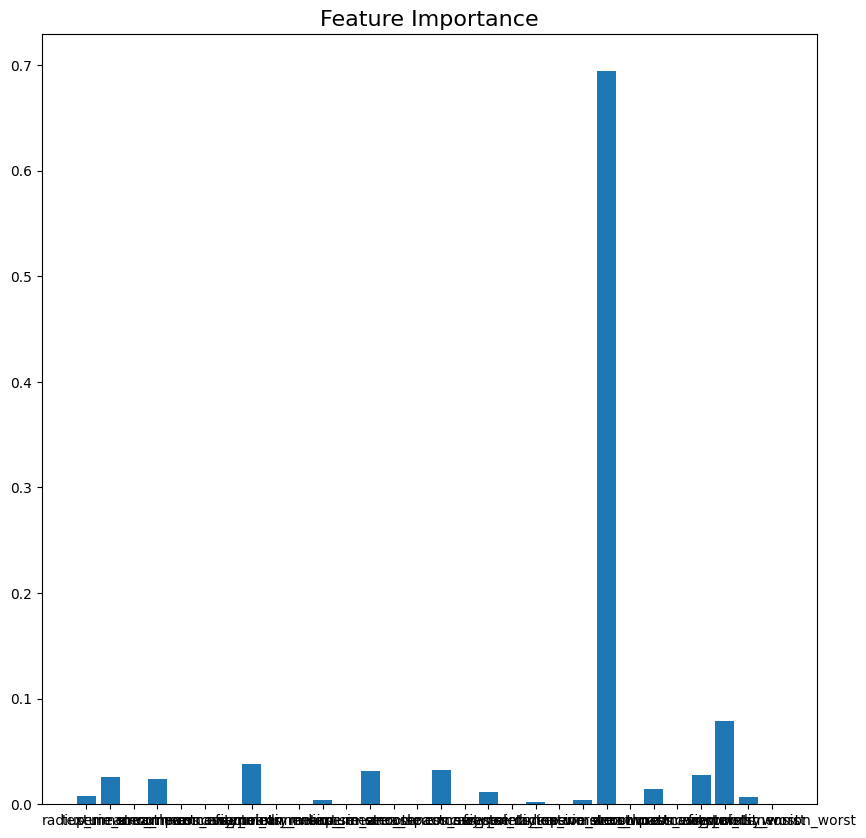

In [16]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, cancer_tree.feature_importances_) #average reduction in impurity resulting from splitting at each node of the tree using that feature
plt.title('Feature Importance', fontsize=16);

In [17]:
# Extract feature importances
feature_importances = cancer_tree.feature_importances_

# Get indices of sorted feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]

# Sort feature importances and feature names
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Importance': sorted_feature_importances
})

print(feature_importances_df)

                    Feature  Importance
0           perimeter_worst    0.694591
1      concave points_worst    0.078877
2       concave points_mean    0.037805
3            compactness_se    0.032254
4              perimeter_se    0.030964
5           concavity_worst    0.027420
6              texture_mean    0.025473
7                 area_mean    0.023417
8          smoothness_worst    0.014118
9         concave points_se    0.011289
10              radius_mean    0.007526
11           symmetry_worst    0.006764
12            texture_worst    0.003610
13                radius_se    0.003481
14     fractal_dimension_se    0.002412
15              symmetry_se    0.000000
16             concavity_se    0.000000
17             radius_worst    0.000000
18  fractal_dimension_worst    0.000000
19        compactness_worst    0.000000
20               area_worst    0.000000
21            smoothness_se    0.000000
22            symmetry_mean    0.000000
23   fractal_dimension_mean    0.000000


### Pruning the tree

Now we will prune the tree to see if we can improve performance.

There are different Pruning Parameters:

 - max_leaf_nodes: Reduce the number of leaf nodes
 - min_samples_leaf: Restrict the size of sample leaf. Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total 
 - max_depth: Reduce the depth of the tree to build a generalized tree. Set the depth of the tree to 3, 5, 10 depending after verification on test data
 - etc..

Let's focus on the depth of the tree. We will test different depth thresholds via CV by using the `GridSearchCV` provided by sklearn.

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': range(1,16)} # 15 different depth levels

cancer_tree_pruned_cv = GridSearchCV(cancer_tree, 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=1, verbose=1)

cancer_tree_pruned_cv.fit(X_train,Y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/home/codespace/.local/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [19]:
print("Best parameters set found on development set:")
print()
print(cancer_tree_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = cancer_tree_pruned_cv.cv_results_['mean_test_score']
stds = cancer_tree_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, cancer_tree_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 4}

Grid scores on development set:

Accuracy = 0.866 (+/0.018) for {'max_depth': 1}
Accuracy = 0.905 (+/0.048) for {'max_depth': 2}
Accuracy = 0.915 (+/0.061) for {'max_depth': 3}
Accuracy = 0.926 (+/0.057) for {'max_depth': 4}
Accuracy = 0.922 (+/0.053) for {'max_depth': 5}
Accuracy = 0.922 (+/0.053) for {'max_depth': 6}
Accuracy = 0.922 (+/0.066) for {'max_depth': 7}
Accuracy = 0.922 (+/0.066) for {'max_depth': 8}
Accuracy = 0.922 (+/0.066) for {'max_depth': 9}
Accuracy = 0.922 (+/0.066) for {'max_depth': 10}
Accuracy = 0.922 (+/0.066) for {'max_depth': 11}
Accuracy = 0.922 (+/0.066) for {'max_depth': 12}
Accuracy = 0.922 (+/0.066) for {'max_depth': 13}
Accuracy = 0.922 (+/0.066) for {'max_depth': 14}
Accuracy = 0.922 (+/0.066) for {'max_depth': 15}


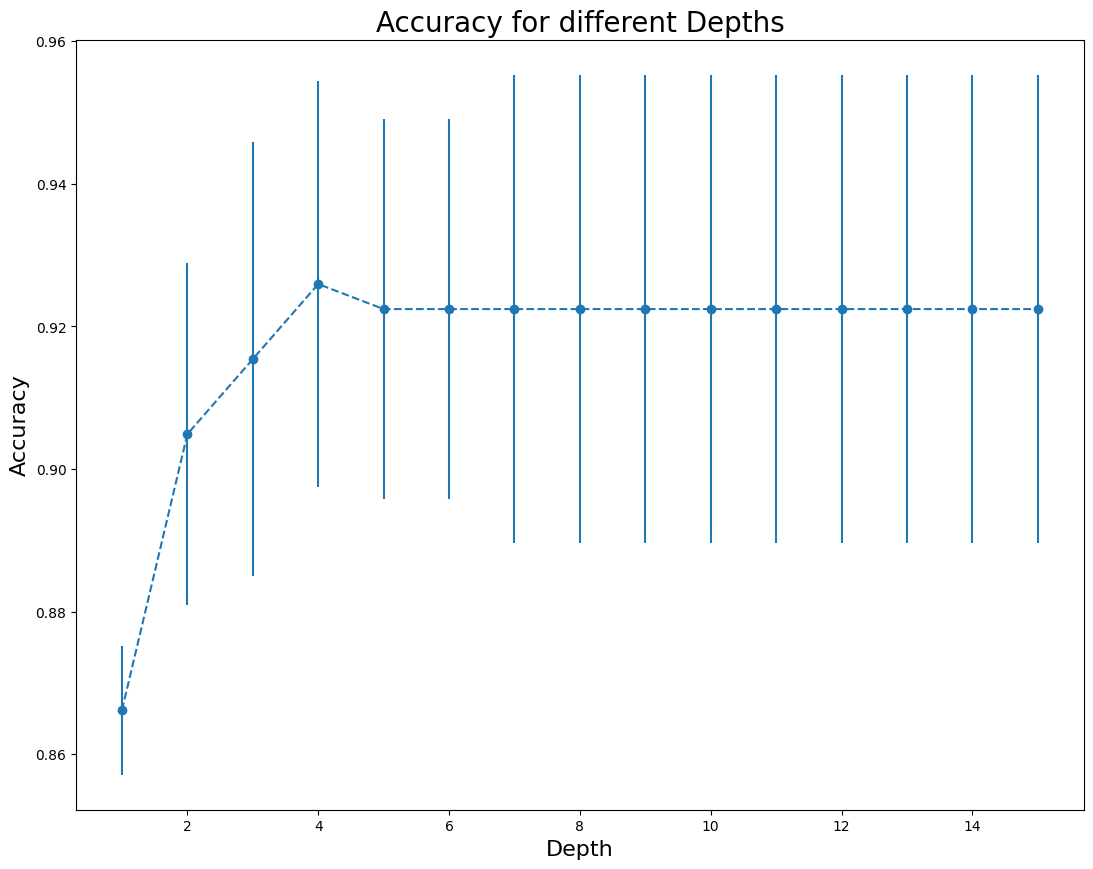

In [20]:
plt.figure(figsize=(13,10))
plt.errorbar(range(1,16,1), [m for m in means], yerr=stds, fmt='--o')
plt.title('Accuracy for different Depths', fontsize=20)
plt.xlabel("Depth", fontsize=16)
plt.ylabel("Accuracy", fontsize=16);

As can be seen in the plot, the optimal value for the depth of the decision tree is 4.

### Test data set

Let's now calculate accuracy for test data set

In [21]:
# Initialize and train the pruned decision tree classifier
# cancer_tree_pruned = DecisionTreeClassifier(random_state=42, max_depth=4)
# tree = cancer_tree_pruned.fit(X_train, Y_train)

# Make predictions on the test set
# predictions = cancer_tree_pruned.predict(X_test)

# Print the accuracy of the model
# print("Accuracy = {0:.4f}".format(accuracy_score(Y_test, predictions)))

# Import necessary metrics
# from sklearn.metrics import recall_score, precision_score

# Predict probabilities for the positive class (class 1)
# prob_pred = tree.predict_proba(X_test)[:, 1]

# Define thresholds for converting probabilities to binary predictions
# thresholds = np.arange(0.0, 1.0, step=0.1)

# Function to convert probabilities to string labels based on a threshold
# def convert_predictions(prob_pred, threshold):
#     return np.where(prob_pred > threshold, 'M', 'B')

# Calculate recall scores for each threshold
# recall_scores = [recall_score(Y_test, convert_predictions(prob_pred, t), pos_label='M') for t in thresholds]

# Calculate precision scores for each threshold
# precis_scores = [precision_score(Y_test, convert_predictions(prob_pred, t), pos_label='M') for t in thresholds]]


cancer_tree_pruned = DecisionTreeClassifier(random_state=42, max_depth=4)
tree=cancer_tree_pruned.fit(X_train, Y_train)
predictions = cancer_tree_pruned.predict(X_test)
print("Accuracy = {0:.4f}".format(accuracy_score(Y_test, predictions)))

from sklearn.metrics import recall_score, precision_score
prob_pred = tree.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.0, 1.0, step=0.1)
recall_scores = [metrics.recall_score(Y_test, prob_pred > t) for t in thresholds]
precis_scores = [metrics.precision_score(Y_test, prob_pred > t) for t in thresholds]

Accuracy = 0.9193


Great! We have increase the accuracy with a smaller tree.

Now, we represent the different values for the metrics obtained using different thresholds

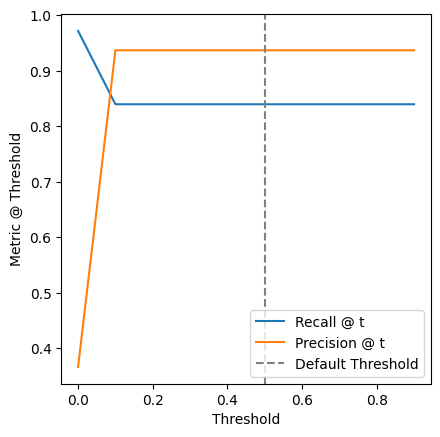

In [22]:
fig, ax = plt.subplots(1, 1)
ax.plot(thresholds, recall_scores, label="Recall @ t")
ax.plot(thresholds, precis_scores, label="Precision @ t")
ax.axvline(0.5, c="gray", linestyle="--", label="Default Threshold")
ax.set_xlabel("Threshold")
ax.set_ylabel("Metric @ Threshold")
ax.set_box_aspect(1)
ax.legend()
plt.show()

In [23]:
pred = tree.predict_proba(X_test) > 0.1
pred

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ Tr

In [24]:
# How many nodes and leaves?
print("Number of nodes: ", cancer_tree_pruned.tree_.node_count)
print("Number of leaves: ", cancer_tree_pruned.get_n_leaves())

Number of nodes:  19
Number of leaves:  10


And we can represent the set of rules

In [25]:
from sklearn import tree

text_representation = tree.export_text(cancer_tree_pruned)
print(text_representation)
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

|--- feature_22 <= 112.80
|   |--- feature_27 <= 0.18
|   |   |--- feature_3 <= 696.25
|   |   |   |--- feature_24 <= 0.19
|   |   |   |   |--- class: 0
|   |   |   |--- feature_24 >  0.19
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  696.25
|   |   |   |--- feature_11 <= 0.77
|   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  0.77
|   |   |   |   |--- class: 1
|   |--- feature_27 >  0.18
|   |   |--- class: 1
|--- feature_22 >  112.80
|   |--- feature_7 <= 0.05
|   |   |--- feature_15 <= 0.02
|   |   |   |--- feature_24 <= 0.11
|   |   |   |   |--- class: 0
|   |   |   |--- feature_24 >  0.11
|   |   |   |   |--- class: 1
|   |   |--- feature_15 >  0.02
|   |   |   |--- class: 0
|   |--- feature_7 >  0.05
|   |   |--- feature_26 <= 0.20
|   |   |   |--- class: 0
|   |   |--- feature_26 >  0.20
|   |   |   |--- class: 1



### Visualization

We are going to deep down a bit more on the tree.<BR>


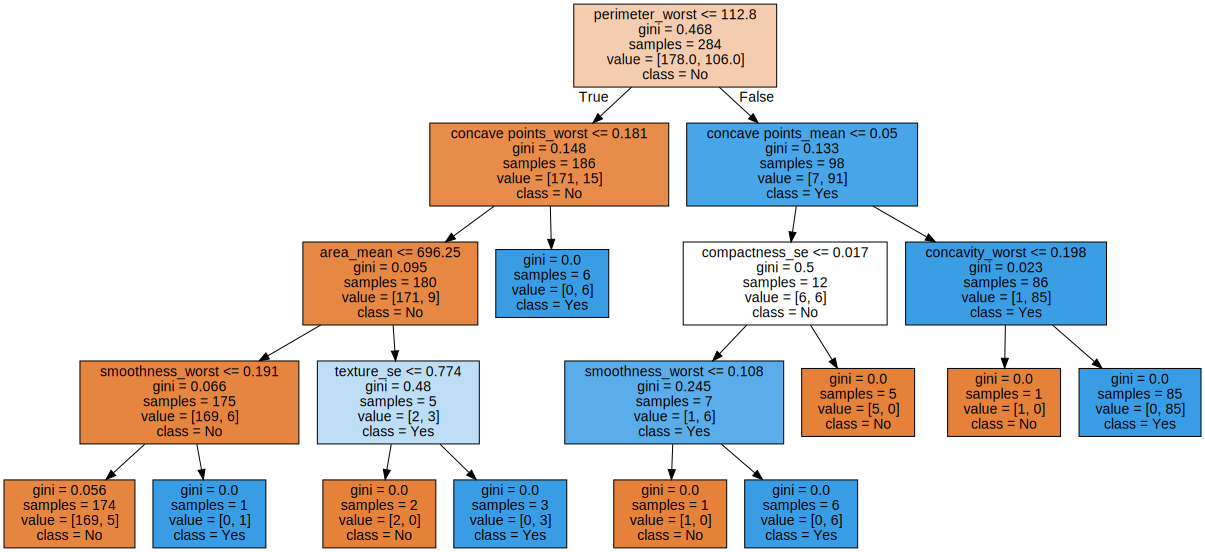

In [26]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(cancer_tree_pruned, out_file=None, 
                                class_names=["No","Yes"],
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [27]:
# Save it into a high resolution image
graph.render("titanic_tree_graphivz")

'titanic_tree_graphivz.png'

## Alternative visualization: dtreeviz
we need to install the powerful library *dtreeviz* for this

In [28]:
## ! pip install dtreeviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

# Convert string labels to numeric labels
#label_encoder = LabelEncoder()
#Y_train_numeric = label_encoder.fit_transform(Y_train)
#Y_test_numeric = label_encoder.transform(Y_test)

# Train the decision tree model with numeric labels
cancer_tree_pruned = DecisionTreeClassifier(max_depth=4)
cancer_tree_pruned.fit(X_train, Y_train_numeric)

# Visualize the tree
viz_cmodel = dtreeviz.model(cancer_tree_pruned,
                            X_train=X_train,
                            y_train=Y_train_numeric,
                            feature_names=X_train.columns,
                            target_name='diagnosis',
                            class_names=list(label_encoder.classes_))

viz_cmodel.view()

NameError: name 'Y_train_numeric' is not defined

Display now frequencies for each node.<BR>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

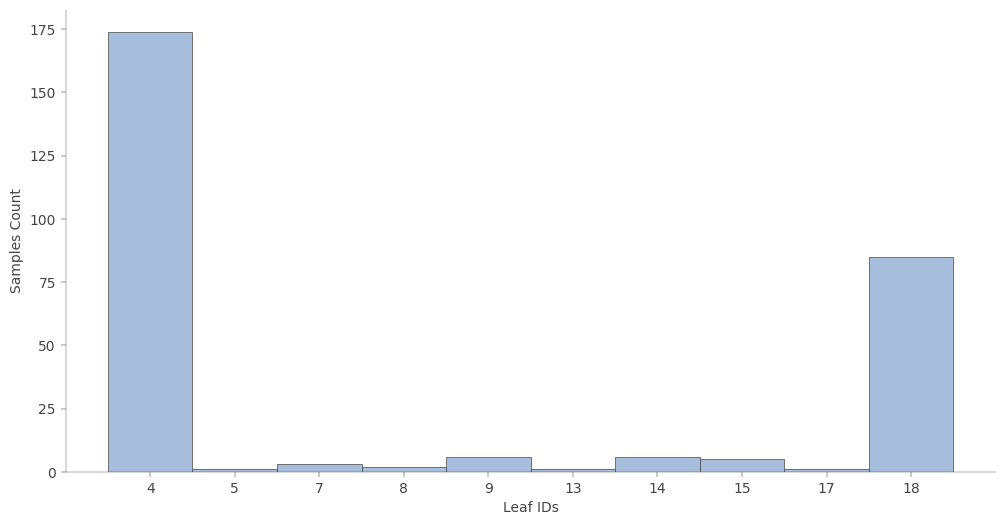

In [ ]:
viz_cmodel.leaf_sizes(figsize=(12,6))

We can see node id=6 is the one with maximum amount of people

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

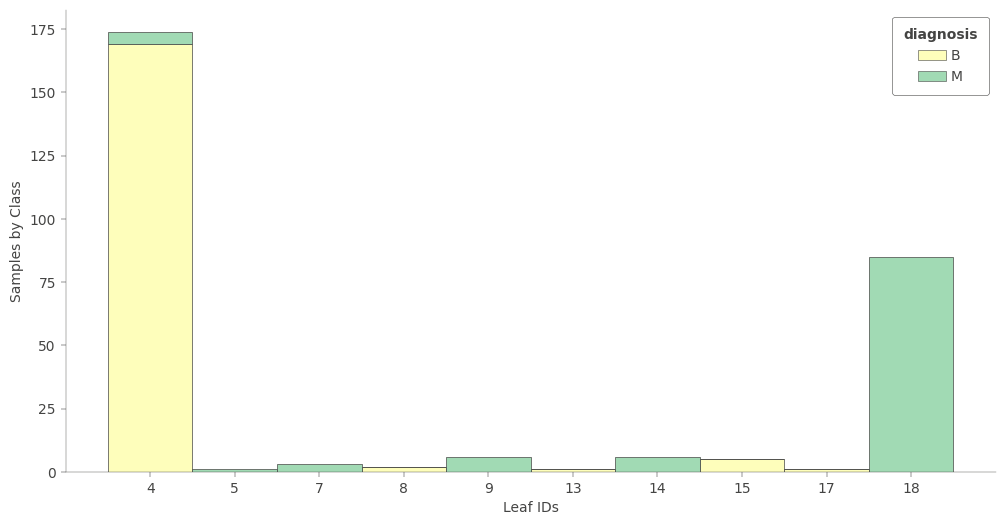

In [ ]:
# Compare it with target classes
viz_cmodel.ctree_leaf_distributions(figsize=(12,6))

Let's explore that node

In [ ]:
viz_cmodel.node_stats(node_id=6)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,15.6,21.188,100.69,753.6,0.09193,0.078916,0.068916,0.043552,0.17518,0.056104,...,16.684,24.346,107.988,857.84,0.122254,0.155274,0.201196,0.097508,0.24928,0.066734
std,0.539073,7.522471,4.241321,48.569692,0.008677,0.035475,0.039175,0.015197,0.011906,0.0039,...,0.966504,8.886545,7.056041,94.889478,0.023087,0.095002,0.136247,0.049101,0.062249,0.010438
min,14.99,11.28,95.54,698.8,0.0832,0.04605,0.02398,0.02739,0.1565,0.05294,...,14.99,14.2,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
25%,15.13,15.7,96.71,719.5,0.08401,0.05131,0.04686,0.02899,0.1711,0.05338,...,16.84,17.76,109.8,854.3,0.1131,0.09866,0.1547,0.06575,0.23,0.06165
50%,15.73,23.95,102.8,747.2,0.09387,0.06712,0.05526,0.04563,0.1784,0.05504,...,17.01,25.2,110.1,876.5,0.1148,0.1361,0.1947,0.1119,0.2557,0.06287
75%,15.85,25.2,103.7,782.7,0.09427,0.1002,0.09938,0.05364,0.1847,0.05657,...,17.26,27.66,112.0,928.2,0.1354,0.1924,0.2322,0.1357,0.2809,0.0723
max,16.3,29.81,104.7,819.8,0.1043,0.1299,0.1191,0.06211,0.1852,0.06259,...,17.32,36.91,112.5,931.4,0.1541,0.2979,0.4004,0.1452,0.3233,0.08181


And highlight it in the tree so that we can take a closer look at it

/home/codespace/.python/current/lib/python3.12/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfo

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

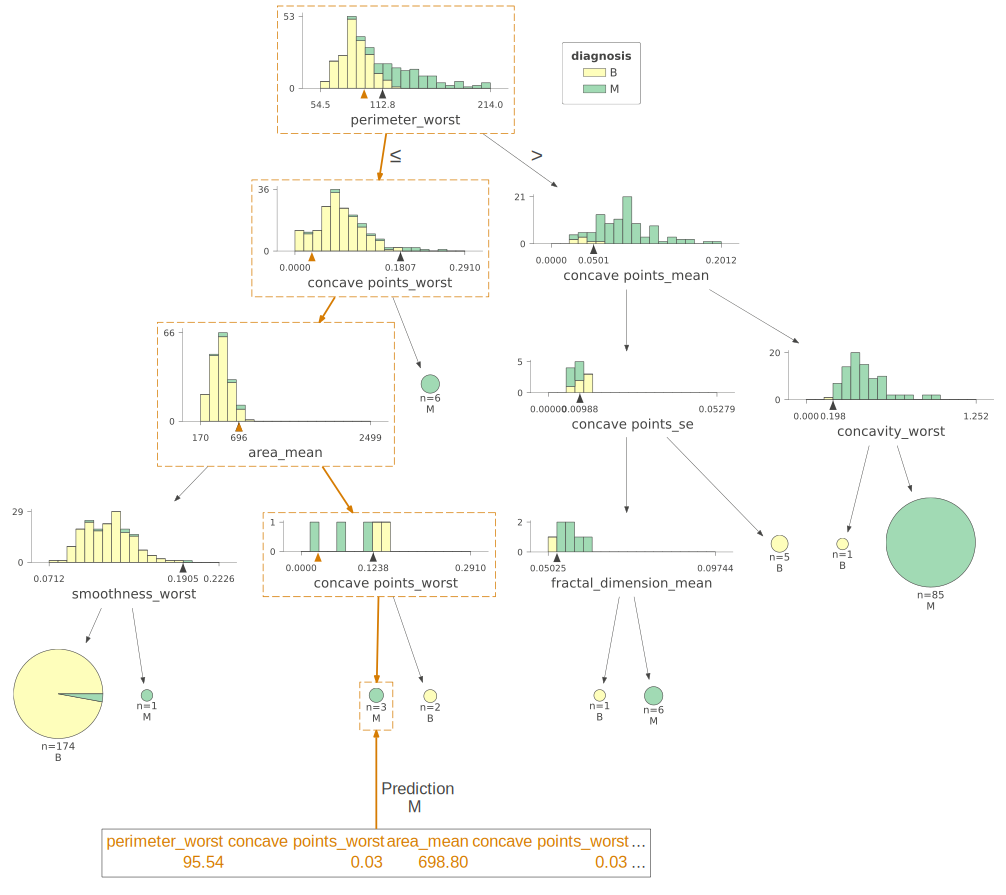

In [ ]:
x = X_train[X_train.columns].iloc[1]
viz_cmodel.view(x=x, scale=1.5)

## Model performance

Finally, let's going to analyze model performance (on test data set)

Text(50.722222222222214, 0.5, 'Predicted Values')

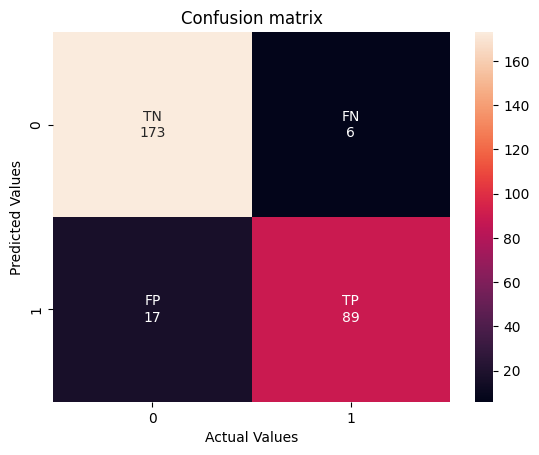

In [ ]:
import seaborn as sns

conf_mat = confusion_matrix(Y_test, predictions)

fig, ax = plt.subplots()
label_names = ['TN','FN','FP','TP']
label_counts = ['{0:0.0f}'.format(value) for value in conf_mat.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(label_names,label_counts)]
labels = np.asarray(labels).reshape(2,2)

# Draw heatmap using confusion matrix
sns.heatmap(conf_mat, annot=labels, fmt='')
ax.set_title('Confusion matrix')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
